In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("vgsales.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16291 non-null  int64  
 1   name          16291 non-null  object 
 2   platform      16291 non-null  object 
 3   year          16291 non-null  float64
 4   genre         16291 non-null  object 
 5   publisher     16291 non-null  object 
 6   na_sales      16291 non-null  float64
 7   eu_sales      16291 non-null  float64
 8   jp_sales      16291 non-null  float64
 9   other_sales   16291 non-null  float64
 10  global_sales  16291 non-null  float64
 11  decade        16291 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
   rank                      name platform    year         genre publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Ninte

<ipython-input-37-516764e92cd0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["genre"].value_counts().index, y=df["genre"].value_counts().values, palette="viridis")


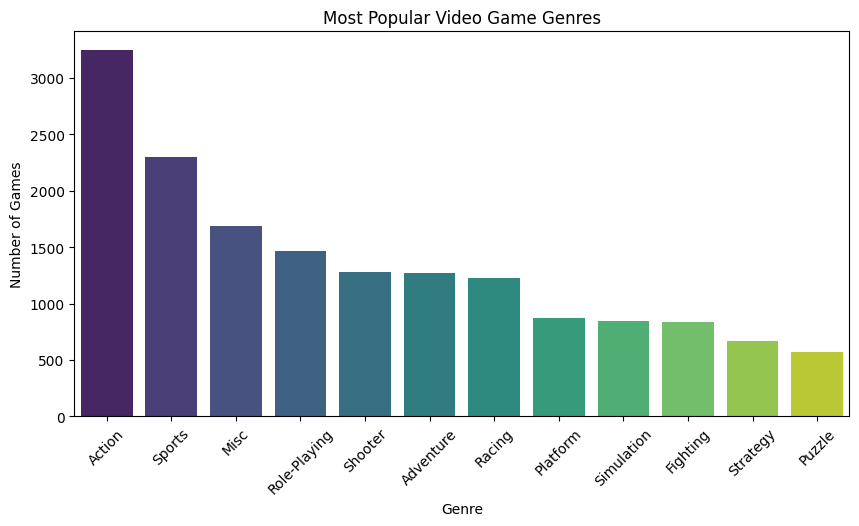

<ipython-input-37-516764e92cd0>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="global_sales", data=df, palette="coolwarm")


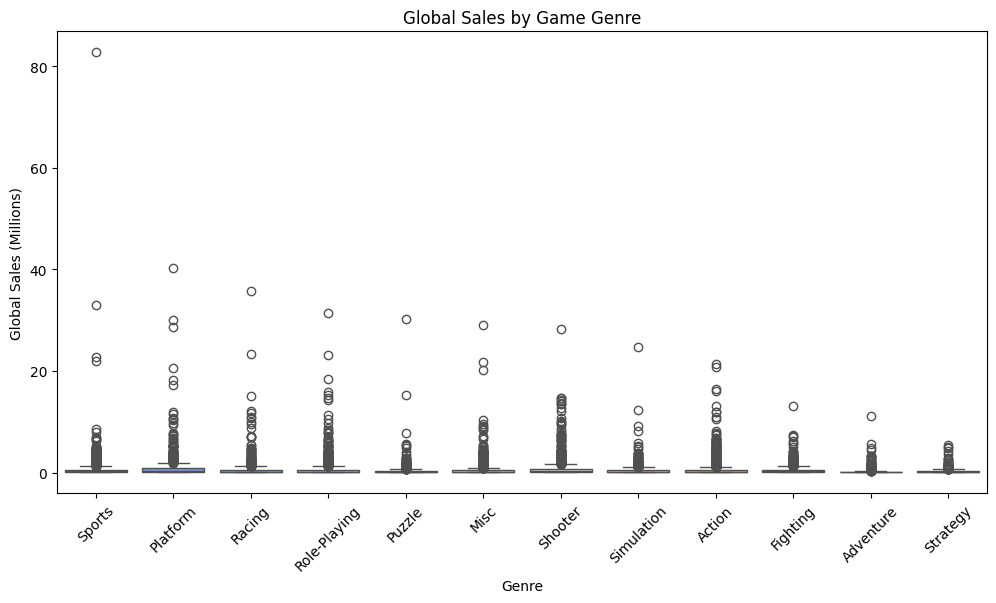

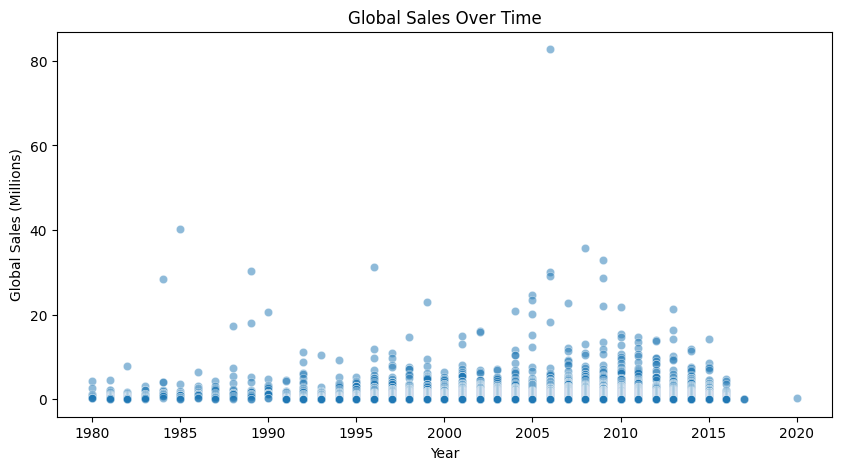

Estimated Median Global Sales: 0.17


In [37]:

print(df.info())
print(df.head())
print(df.columns)

df.columns = df.columns.str.lower().str.replace(" ", "_")

df = df.dropna()


df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df.dropna(subset=["year"])
df["global_sales"] = pd.to_numeric(df["global_sales"], errors="coerce")


df["decade"] = (df["year"] // 10) * 10


plt.figure(figsize=(10, 5))
sns.barplot(x=df["genre"].value_counts().index, y=df["genre"].value_counts().values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Most Popular Video Game Genres")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="global_sales", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.title("Global Sales by Game Genre")
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(x="year", y="global_sales", data=df, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.title("Global Sales Over Time")
plt.show()


sample_size = int(0.1 * len(df))
sample = df.sample(sample_size, random_state=42)


sample_median = sample["global_sales"].median()
print(f"Estimated Median Global Sales: {sample_median}")
